In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<Axes: xlabel='count', ylabel='domain'>

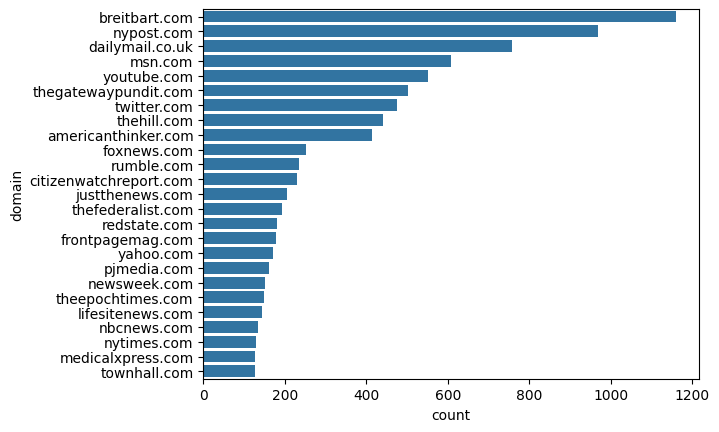

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<Axes: xlabel='count', ylabel='posted_by'>

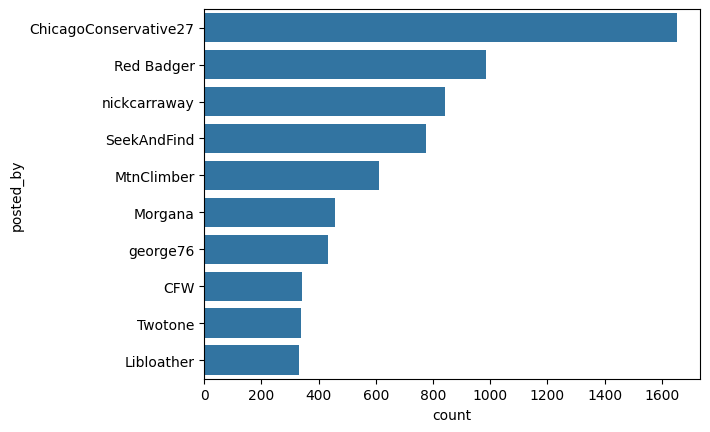

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

/tmp/ipykernel_196983/2178239382.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["domain", "posted_by"])


domain         \
                                              count unique   
domain                 posted_by                             
americanthinker.com    CFW                        1      1   
                       MtnClimber               231      1   
                       Red Badger                 2      1   
                       SeekAndFind              132      1   
                       george76                   1      1   
breitbart.com          CFW                        3      1   
                       Red Badger                 8      1   
                       george76                   1      1   
                       ChicagoConservative27    928      1   
                       Morgana                    9      1   
                       Twotone                    2      1   
citizenwatchreport.com Red Badger                 2      1   
dailymail.co.uk        CFW                        2      1   
                       Red Badger                16      1   
                       george76                  10      1   
                       ChicagoConservative27      2      1   
                       Morgana                  162      1   
                       Twotone                    3      1   
                       Libloather               133      1   
                       nickcarraway               3      1   
foxnews.com            CFW                        4      1   
                       Red Badger                 2      1   
                       george76                  15      1   
                       ChicagoConservative27     14      1   
                       Libloather                47      1   
                       nickcarraway               5      1   
frontpagemag.com       CFW                        2      1   
                       MtnClimber                29      1   
                       george76                   7      1   
justthenews.com        CFW                       59      1   
                       MtnClimber                14      1   
                       Red Badger                18      1   
                       george76                   8      1   
                       Twotone                   12      1   
                       Libloather                 1      1   
lifesitenews.com       Red Badger                 1      1   
                       Morgana                    8      1   
medicalxpress.com      Red Badger                 1      1   
                       george76                   1      1   
msn.com                Red Badger                 1      1   
                       SeekAndFind               17      1   
                       ChicagoConservative27     13      1   
                       Twotone                    5      1   
                       Libloather                62      1   
                       nickcarraway              46      1   
nbcnews.com            CFW                        7      1   
                       MtnClimber                 1      1   
                       Red Badger                14      1   
                       george76                   1      1   
                       ChicagoConservative27      2      1   
                       Libloather                 1      1   
                       nickcarraway               7      1   
newsweek.com           CFW                        1      1   
                       Red Badger                 7      1   
                       george76                   2      1   
                       ChicagoConservative27      2      1   
                       Twotone                    1      1   
                       Libloather                 1      1   
                       nickcarraway               5      1   
nypost.com             CFW                       10      1   
                       MtnClimber                 2      1   
                       Red Badger                15      1   
               

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

/tmp/ipykernel_196983/1921096508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby('title').


,timestamp,replies
title,,
"The Francis Scott Key Bridge Collapse in Baltimore, Maryland",2024-03-26 11:43:14,383.0
SOTU discussion Thread,2024-03-08 04:44:30,380.0
"LIVE: PRESIDENT TRUMP HOLDS MAGA RALLY IN MANCHESTER, NEW HAMPSHIRE – 1/20/24",2024-01-21 01:00:18,322.0
"**LIVE** WATCH ELECTION NIGHT RESULTS IN NEW HAMPSHIRE LIVE FROM THE TRUMP CAMPAIGN WATCH PARTY Jan.23,2024 6PM ET",2024-01-24 01:25:46,304.0
"Judge fines Donald Trump more than $300 million, bars him from running businesses in N.Y. for three years",2024-02-16 21:53:54,223.0
"Trump must pay $ 83.3 MILLION to E. Jean Carroll for defamation, a federal jury has ruled.",2024-01-26 23:51:46,216.0
Supreme Court Reverses Colorado Decision,2024-03-04 16:05:27,207.0
Vanity: Get Ready for Barack Obama's Third Term,2024-02-14 22:10:38,179.0
Developing: New York AG Letitia James Could Start Seizing President’s Property on Monday,2024-03-20 00:12:49,177.0
